Accuracy: 0.631578947368421
F1 score: 0.0
Confusion matrix:


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


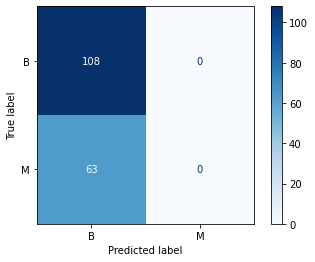

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


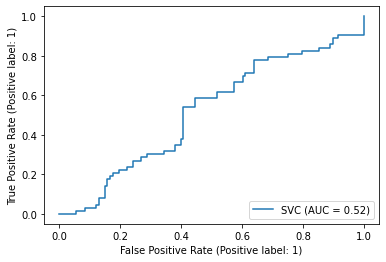

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve

# Load data from CSV file
data = pd.read_csv('breast-cancer.csv')

# Separate features and target variable
X = data.drop('diagnosis', axis=1)
y = data['diagnosis'].map({'M': 1, 'B': 0}) # convert to 0 and 1 labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create SVM classifier with radial basis function (RBF) kernel and default parameters
clf = SVC(kernel='rbf')

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = clf.predict(X_test)

# Convert numeric labels back to categorical labels for f1_score()
y_test_cat = y_test.map({1: 'M', 0: 'B'})
y_pred_cat = pd.Series(y_pred).map({1: 'M', 0: 'B'})

# Print the accuracy, F1 score, and confusion matrix of the classifier
print("Accuracy:", clf.score(X_test, y_test))
print("F1 score:", f1_score(y_test_cat, y_pred_cat, labels=['B', 'M'], pos_label='M'))

print("Confusion matrix:")
plot_confusion_matrix(clf, X_test, y_test, display_labels=['B', 'M'], cmap=plt.cm.Blues)
plt.show()

# Plot ROC curve
plot_roc_curve(clf, X_test, y_test)
plt.show()
